In [107]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

### Linear Regression (simple)

#### First we will understand what Regression means.
Regression : is basically a statistical method used to examine relationship between one or more
independent variables (input variables or predictors) and a dependent variable (output or target variables).

The goal of Entire regression algorithms is to relate these with each other and form a sort of graph which 
will help us predict any new input that we might found.

##### We relate the input and output by creating a so-called best fit line in linear regression.

### Linear Regression

Linear regression is a supervised machine learning algorithm used to establish a relationship between input and 
output variables through a "best-fit" line. As the name suggests, this line adheres to a linear relationship between the input and output.

#### Symbols Used:

1. **Input Value (Independent Variable)**: $ x $
2. **Output Value (Dependent Variable)**: $ y $
3. **Predicted Output**: $ \hat{y} $

#### Intercept and Slope/Coefficient:

4. **Intercept**: $ \beta_0 \quad \text{or} \quad b $ 
5. **Slope (Coefficient aka weights)**: $ \beta_1 \quad \text{or} \quad w $
6. **Error Term**: $ \epsilon $

There are multiple symbols that represent these values; you can explore them yourself. I will mostly use \( w \) and \( b \).

#### General Equation (Model Function):

The general equation that relates the input \( x \) and output \( y \) values is:
$$
y = b + w_1x_1 + w_2x_2 + \ldots + w_nx_n + \epsilon
$$
also written as
$$
f(w,b) = b + w_1x_1 + w_2x_2 + \ldots + w_nx_n + \epsilon
$$
Here, $ w_1, w_2, \ldots, w_n $ denote the coefficients for the respective input variables $ x_1, x_2, \ldots, x_n $

#### Features and Model Learning:

The \( x \) variables are also known as "features" (These are basically the values on which our output depends) used by the model to predict \( y \). The coefficients \( w \) (weights) and intercept \( b \) are parameters that the model learns during training to accurately predict \( y \).

In summary, our goal is to determine these \( w \) and \( b \) variables based on our \( x \) and \( y \) data, which will result in the best-fit line. This line, in turn, allows us to predict outputs for new inputs.

In this notebook we will impliment Simple liner Regression which only has the bias or intercept and 1 slop value ie.
f_wb = b + wx   (meaning n = 1)

Let's start by plotting a basic data and finding a best fit line for it.



In [108]:
#House Price Prediction

# Generate random data for house area
np.random.seed(0)
x = np.random.randint(800, 5000, size=20)
# Generate corresponding house prices
y = 50 * x + np.random.randint(0, 10000, size=20)

# you may ignore this cell as i am basically making some random data, 
# we will learn about importing the data, and data analysis in EDA, 
# and while making projects

Input value (here Area of house: ) [3532 3407 2453 4064 1833 4268 1505 3399 2935 3022 3697 2501 1337 3693
 2963 2846 2671 3296  899 2808]
Output Value (here price of the house: ) [177355 171147 123309 206419 100265 220856  78587 172695 151485 159836
 191537 125764  69142 192993 149357 148472 142544 172021  50971 144022]
Shape of x: (20,)
Shape of y: (20,)


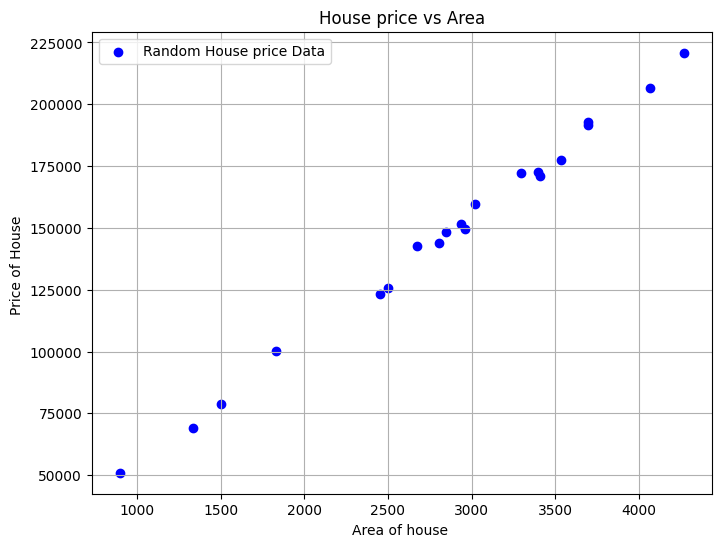

In [109]:
#let's print this generated data and plot it using.

print("Input value (here Area of house: )",x)
print("Output Value (here price of the house: )",y)
print("Shape of x:",x.shape)
print("Shape of y:",y.shape)


plt.figure(figsize=(8,6))
plt.scatter(x,y,color = 'blue',label = 'Random House price Data')
plt.xlabel("Area of house ")
plt.ylabel("Price of House ")
plt.title("House price vs Area")
plt.legend()
plt.grid(True)
plt.show()


#### As you can see in the plotted data, there is a clear relationship between the area of a house and its price.
We now need to find the best-fit line.
let's start by plotting a basic line on this data.

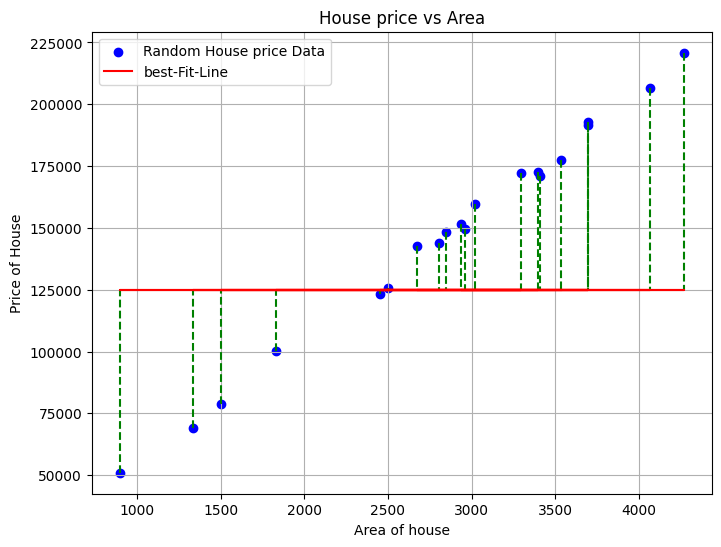

In [110]:
#plotting a line on this data.
b = 125000 #(intercept)
w = 0    #(slope)
f_wb = b + w * x

plt.figure(figsize=(8,6))
plt.scatter(x,y,color = 'blue',label = 'Random House price Data')
plt.xlabel("Area of house")
plt.ylabel("Price of House")
plt.title("House price vs Area")
plt.grid(True)
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], f_wb[i]], color='green', linestyle='--')
plt.plot(x,f_wb,color = 'red', linestyle = '-',label = "best-Fit-Line")
plt.legend()
plt.show()

#### The above plotted line obviously has alot of error as the yhat value (prediction made by model) and actual y(output) have a lot of difference.

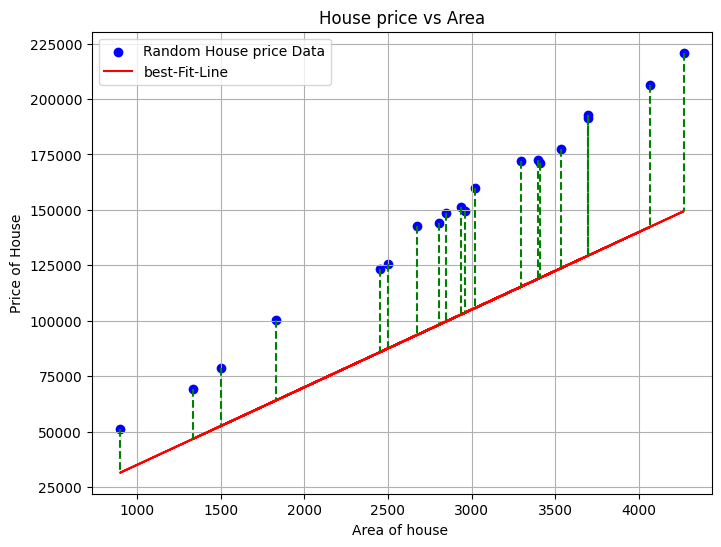

In [111]:
#let's try tweaking the value of w and b
b = 0
w = 35
f_wb = b + w * x
plt.figure(figsize=(8,6))
plt.scatter(x,y,color = 'blue',label = 'Random House price Data')
plt.xlabel("Area of house ")
plt.ylabel("Price of House")
plt.title("House price vs Area")
plt.grid(True)
plt.plot(x,f_wb,color = 'red', linestyle = '-',label = "best-Fit-Line")
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], f_wb[i]], color='green', linestyle='--')
plt.legend()
plt.show()

#### Now we can't manually tweak these w and b values to find the best-fit line, here we will start training the algorithm.

To predict the price of new houses, it's common practice to train a machine learning algorithm on existing data. We start by splitting our dataset into two parts: training data and test data. In this case, I've generated 20 data points each for house prices and areas. We'll use 15 data points for training and reserve 5 data points for testing.

This approach ensures that we have labeled data (with known outcomes) to train our model (using the training data) and then evaluate its accuracy on unseen data (the test data).

Additionally, we need to quantify how poorly a model is performing (meaning - its error) so that we can reduce it and keep track of it later down the road. 
For this we need to define a function in machine learning, we call such funciton as **Loss Function** or **Cost Function**.

###### The  keen-eyed would have found by now the value of w and b to be 50 and 0. As this is a fairly simple data.

#### Let's continue by defining this Error.
Now as we know these are points plotted in the x-y plane so distance between the y value and yhat value will be the error. But this won't accuratly measure how bad our model is performing. For that we will introduce a **Loss Function**. Here we will use the most popular one **MSE** or **Mean-Squared-Error**.

#### Mean Squared Error

$$ J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2 $$

Here, \( y_i \) represents the target value (actual observed value), and \( \hat{y}_i \) represents the prediction given by our best-fit line. \( m \) denotes the total number of data points.
The above euqation is also denoted in terms of f(w,b) (model function) as,

$$ J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (f_{wb}(x_i) - y_i)^2 $$


The function calculates the mean of the squared errors, which are obtained by subtracting \( y_i \) from \( \hat{y}_i \) and squaring the result across all data points ( "i" represents
that). Dividing by \( 2m \) provides the average squared error per data point.

The additional factor of 2 in the denominator simplifies the gradient computation during optimization (gradient explained later).

Our goal is to minimize \( J(w, b) \) by adjusting the parameters \( w \) (weights) and \( b \) (bias/intercept).

Let's continue by plotting the J(w,b) for our current w and b.



In [112]:
#first we will split the data into train and test, we have a fairly small dataset
#we can normally split it without the use of any functions.
x_train,x_test = x[:15],x[15:20]
y_train,y_test = y[:15],y[15:20]

#let's print to see the splited data.
print("X Train : ", x_train)
print("X_Test",x_test)
print("Y Train : ", y_train)
print("Y_Test",y_test)

#we will later discuss more way of spliting big amounts of data.


X Train :  [3532 3407 2453 4064 1833 4268 1505 3399 2935 3022 3697 2501 1337 3693
 2963]
X_Test [2846 2671 3296  899 2808]
Y Train :  [177355 171147 123309 206419 100265 220856  78587 172695 151485 159836
 191537 125764  69142 192993 149357]
Y_Test [148472 142544 172021  50971 144022]


In [113]:
# First we will write the function that produces the output 
# value yhat for a given value of w and b
# This is also called as the model function output
def compute_model_output (x,w,b):
    """
    This function takes the value of input training data, and found the output for a give set
    of w and b

    Args:
    x_train (nd_array) : training input data
    w (float) : slope of the linear model function
    b (float) : Intercept (bias) of the linear model function

    Returns:
    yhat (ndarray) : output values 
    """

    m = x.shape[0] #finding the total number of data points
    yhat = np.zeros(m)  #initializing an array of size m

    for i in range(m):
        yhat[i] = w * x[i] + b  #f_wb model function

    return yhat


In [114]:
#now we will compute the MSE or simply the error produced by our current model
#there are 2 way to compute cost function, 1 is to implement the model_output inside this function, 
#or compute it sepratly and pass it as an argument. here i will pass yhat as an argument(2 way).
def compute_loss_MSE(yhat,y):
    """
    This Funtion computes the Mean Sqaued Error 
    of our model on traning data.

    Args:
    yhat (ndarray) :  predictions made by our model
    y (ndarray) : actual values or target value

    Returns:
    total_cost (also called total_loss)
    """

    m = y.shape[0]
    cost_sum = 0

    for i in range(m):
        cost = (yhat[i] - y[i])**2  #here if i used an extra variable to compute 
                                    #the value of yhat that would be the 1st way
                                    #it requires extra varibles to give in the arguments (w,b,x_train) defined below
        cost_sum += cost

    total_cost = cost_sum / (2*m)

    return total_cost


#you can additionally define the cost funciton like so
def compute_cost_MSE (x,y,w,b):
    """
    This Funtion computes the Mean Sqaued Error 
    of our model on traning data.

    Args:
        x (ndarray) : input values
        y (ndarray) : actual values or target value
        w (scalar)  : slope paramter 
        b (scalar)  : intercept or bias parameter
    Returns:
        total_cost (also called total_loss)
    """
    

    m = x.shape[0]
    cost_sum = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i])**2
        cost_sum += cost
    
    total_cost = cost_sum / (2*m)

    return total_cost


#### Now that we have implemented the MSE fuction or loss function. Let's visualize the Loss.

In [115]:
b = 0 #let's keep this zero
w = np.linspace(0,100,num=15)
#here i have created a function which will run the above to function for different values of w

def compute_loss(compute_yhat,compute_error): 

    z = w.shape[0]
    loss = np.zeros(z)
    for i in range(z):
        prediction = compute_yhat(x_train,w[i],b)
        print(f"Predictions Made by the model for {w[i]} & {b} : ",prediction,"\n\n")
        loss[i] = compute_error(prediction,y_train)
    
    return loss

loss = compute_loss(compute_model_output,compute_loss_MSE)

print("Target Values: ",y_train)

print("Computed loss:", loss)

Predictions Made by the model for 0.0 & 0 :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 


Predictions Made by the model for 7.142857142857143 & 0 :  [25228.57142857 24335.71428571 17521.42857143 29028.57142857
 13092.85714286 30485.71428571 10750.         24278.57142857
 20964.28571429 21585.71428571 26407.14285714 17864.28571429
  9550.         26378.57142857 21164.28571429] 


Predictions Made by the model for 14.285714285714286 & 0 :  [50457.14285714 48671.42857143 35042.85714286 58057.14285714
 26185.71428571 60971.42857143 21500.         48557.14285714
 41928.57142857 43171.42857143 52814.28571429 35728.57142857
 19100.         52757.14285714 42328.57142857] 


Predictions Made by the model for 21.42857142857143 & 0 :  [75685.71428571 73007.14285714 52564.28571429 87085.71428571
 39278.57142857 91457.14285714 32250.         72835.71428571
 62892.85714286 64757.14285714 79221.42857143 53592.85714286
 28650.         79135.71428571 63492.85714286] 


Predictions Made by the mode

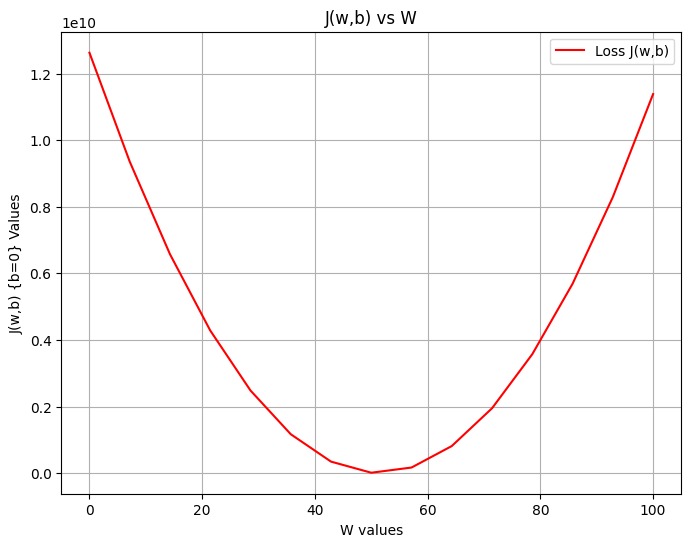

In [116]:
plt.figure(figsize=(8,6))
plt.title("J(w,b) vs W")
plt.plot(w,loss,color='red',label = 'Loss J(w,b)')
plt.xlabel("W values")
plt.ylabel("J(w,b) {b=0} Values")
plt.legend()
plt.grid(True)
plt.show()

#### As you can see above, we get a parabolic curve for all the different values of $ w $ while $ b = 0 $.

###### {This graph will turn 3D and bowl-like once we introduce different values of $ b $ (later).}

From the plot $ J(w, b) $ vs $ w $, we can see that our loss is the lowest when $ w $'s value is approximately 50.
Now, the question is how do we reach this value of $ w $?
Currently, we have fairly simple data, and we ignored $ b $ by keeping it zero. 

Additionally, we are implementing simple linear regression with only one variable, 
so we were able to visually identify this value. 

However, for more complex data with multiple features and different values of both $ b $ and $ w $, 
this will be more difficult. Here, optimization algorithms come into play. 
Optimization algorithms help in reducing this loss. 

One such algorithm is the Gradient Descent Algorithm.


#### Gradient Descent Algorithm 
(Gradient meaning slope)

The curve you saw above is used in gradient descent because the slope of the curve changes at any point. We will take advantage of this property of the curve. On the left of the curve, the gradient is positive, and on the right of the curve, the gradient is negative. We will find the slope at every point on this curve and use it to update the values of $ w $ and $ b $ (here $ b = 0 $ so it does not affect $ b $). This means that if the slope is negative, the value of $ w $ will decrease, and if the slope is positive, the value of $ w $ will increase. This process will stabilize around the lowest point of the curve.

The equation is as follows:

#### Partial Derivatives of the Cost Function:
For the Mean Squared Error (MSE) cost function, the partial derivatives are:

$$ \frac{\partial J(w, b)}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i) x_i $$

$$ \frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i) $$

where $ y_i $ is the target value and $ \hat{y_i} $ is the predicted value.

Now we will use these partial derivatives to update the values of $ w $ and $ b $.

#### Update Rule for Gradient Descent:
The update rules for the weight \( w \) and the bias \( b \) are given by:

$$ w := w - \alpha \frac{\partial J(w, b)}{\partial w} $$

$$ b := b - \alpha \frac{\partial J(w, b)}{\partial b} $$

where:
1. $ \alpha $ is the learning rate (more on this later).
2. $ \frac{\partial J(w, b)}{\partial w} $ is the partial derivative of the cost function with respect to $ w $.
3. $ \frac{\partial J(w, b)}{\partial b} $ is the partial derivative of the cost function with respect to $ b $.

In these equations:
- $ m $ is the number of training examples,
- $ y_i $ is the actual value,
- $ \hat{y}_i $ is the predicted value, $ \hat{y}_i = w x_i + b $.

### Let's further visualize this.

In [117]:
#you can ignore this function and the code below (and in next cells)
def compute_slope(w,loss,point_index):
    if point_index == len(w) - 1:
        return (loss[point_index] - loss[point_index - 1]) / (w[point_index] - w[point_index - 1])
    else:
        return (loss[point_index + 1] - loss[point_index]) / (w[point_index + 1] - w[point_index])
    
point_index = 12 #to get the value of w on the right side
slope = compute_slope(w, loss, point_index)

w_tangent_right = np.linspace(w[point_index] - 10, w[point_index] + 10, 100)
loss_tangent_right = slope * (w_tangent_right - w[point_index]) + loss[point_index]

point_index = 7 #to get the value of w on the middle
slope = compute_slope(w, loss, point_index)

w_tangent_bottom = np.linspace(w[point_index] - 10, w[point_index] + 10, 100)
loss_tangent_bottom = slope * (w_tangent_bottom - w[point_index]) + loss[point_index]

point_index = 3 #to get the value of w in left side
slope = compute_slope(w, loss, point_index)

w_tangent_left = np.linspace(w[point_index] - 10, w[point_index] + 10, 100)
loss_tangent_left = slope * (w_tangent_left - w[point_index]) + loss[point_index]


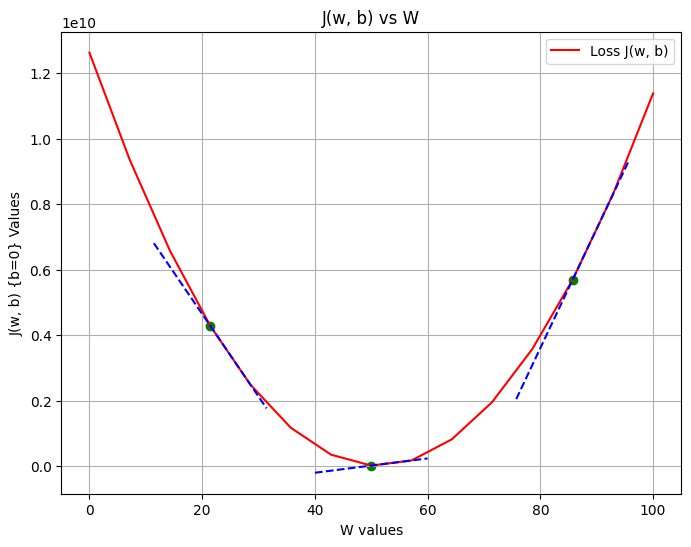

In [118]:
# Plotting the original loss function
plt.figure(figsize=(8, 6))
plt.title("J(w, b) vs W")
plt.plot(w, loss, color='red', label='Loss J(w, b)')
plt.xlabel("W values")
plt.ylabel("J(w, b) {b=0} Values")
plt.legend()
plt.grid(True)
point_index = 12
# Plotting the tangent line
plt.plot(w_tangent_right, loss_tangent_right, color='blue', linestyle='--')
plt.scatter(w[point_index], loss[point_index], color='green')  # Highlight the point
plt.annotate('', (w[point_index], loss[point_index]), 
             textcoords="offset points", xytext=(-10, -10), ha='center')

point_index = 7
# Plotting the tangent line
plt.plot(w_tangent_bottom, loss_tangent_bottom, color='blue', linestyle='--')
plt.scatter(w[point_index], loss[point_index], color='green')  # Highlight the point
plt.annotate('', (w[point_index], loss[point_index]), 
             textcoords="offset points", xytext=(-10, -10), ha='center')

point_index = 3
# Plotting the tangent line
plt.plot(w_tangent_left, loss_tangent_left, color='blue', linestyle='--')
plt.scatter(w[point_index], loss[point_index], color='green') 
plt.annotate('', (w[point_index], loss[point_index]), 
             textcoords="offset points", xytext=(-10, -10), ha='center')
plt.legend()
plt.show()


#### In the above graph, let's look at the point on the right.
We have a tangent passing through this point. The tangent value of the angle made by this line with the x-axis in the clockwise direction will give us the slope at this point. We can visually understand that the angle made by this line is an acute angle (less than 90 degrees), which means the value of $ \tan(\theta) $ will be positive.

So, while updating the quantity:
$$ \alpha \frac{\partial J(w, b)}{\partial w} $$
$$ \alpha \frac{\partial J(w, b)}{\partial b} $$

it will be subtracted from the current value of $ w $, making the $ w $ value come closer to the optimal value of $ w $ (where $ J(w, b) $ is least).

Similarly, we can understand this for the point on the left. This time, the $ \tan(\theta) $ value will be negative, making the update quantity get added to the $ w $ value.

And, when the point is already near the optimal value of $ w $, the value of $ \tan(\theta) $ is so small that it doesn't make any significant changes.

Now, let's understand the $ \alpha $ value. It is also called the **Learning Rate**. It basically decides how large of a step we take while making an update to the parameter. A large value of the learning rate causes the parameter value to bounce around the optimal value and not achieve it. Conversely, for a very small value of the learning rate, the parameter might take a long time to reach the optimal value of $ w $. (we will vizualize this later)

Let's now code this Gradient Descent Algorithm


In [119]:
def compute_gradient(x,y,w,b):
    """
    This function computes the Gradient of cost fuction
    for a given set of w and b values.

    Args:
        x (ndarray) : Traning Input values
        y (ndarray) : Target value or (output values for the input)    
        w (scalar) : slope parameter
        b (scalar) : intercept or bias parameter

    Returns:
        dj_dw : gradient when partially diffrentiated wrt w
        dj_db : gradient when partially diffrentiated wrt b
    """

    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b #calculating the yhat value
        #summing the values of dw and db.
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i 
        dj_db += dj_db_i

    dj_dw /= m
    dj_db /= m

    return dj_dw,dj_db

In [120]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iters,cost_function,gradient_function):
    """
    This Function performs the Gradient descent algorithms i.e it updates the 
    values of w and b to reach the optimal values.

    Args:
        x (ndarray) : Traning Input values
        y (ndarray) : Target value or (output values for the input)    
        w_int (scalar) : slope parameter (initial value)
        b_int (scalar) : intercept or bias parameter (initial value)
        alpha (scalar) : Learning Rate
        num_iters (scalar) : number of iterations
        compute_loss_function (function) : function to call cost function ro MSE
        gradient_function ( function) : function to call compute_gradient function

    Returns:
        w (scalar): Updated value of parameter after running gradient descent
        b (scalar): Updated value of parameter after running gradient descent
        J_history (List): History of cost values
        p_history (list): History of parameters [w,b]
    """

    w = w_in
    b = b_in

    Jwb_hist = [] #stores how the value of J(w,b) changes overtime
    wb_hist = [] #stores how the value of w,b changes overtime

    for i in range(num_iters):

        #First we will calculate the dj_dw and dj_db for current w and b
        dj_dw,dj_db = gradient_function(x,y,w,b)

        #updating the parameters
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        #saving cost J at each iteration
        if i<100000:
            Jwb_hist.append(cost_function(x,y,w,b))
            wb_hist.append([w,b])

         # Print cost every at about intervals 10
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {Jwb_hist[-1]:0.2e} ",f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",f"w: {w: 0.3e}, b:{b: 0.5e}")
            
    return  w, b, Jwb_hist, wb_hist 


##### Now that the Gradient descent algorithm has been implemented let's see it in action.

Iteration    0: Cost 7.75e+09  dj_dw: -1.098e+08, dj_db: -1.230e+05   w:  1.110e+01, b: 1.22977e-03
Iteration   10: Cost 1.04e+09  dj_dw: -1.556e+08, dj_db: -4.841e+04   w:  3.663e+01, b: 9.16281e-03
Iteration   20: Cost 1.42e+08  dj_dw: -5.676e+07, dj_db: -1.777e+04   w:  4.595e+01, b: 1.20675e-02
Iteration   30: Cost 2.29e+07  dj_dw: -2.070e+07, dj_db: -6.588e+03   w:  4.934e+01, b: 1.31379e-02
Iteration   40: Cost 7.08e+06  dj_dw: -7.553e+06, dj_db: -2.511e+03   w:  5.058e+01, b: 1.35391e-02
Iteration   50: Cost 4.97e+06  dj_dw: -2.755e+06, dj_db: -1.023e+03   w:  5.104e+01, b: 1.36962e-02
Iteration   60: Cost 4.69e+06  dj_dw: -1.005e+06, dj_db: -4.808e+02   w:  5.120e+01, b: 1.37643e-02
Iteration   70: Cost 4.66e+06  dj_dw: -3.667e+05, dj_db: -2.828e+02   w:  5.126e+01, b: 1.37998e-02
Iteration   80: Cost 4.65e+06  dj_dw: -1.338e+05, dj_db: -2.106e+02   w:  5.128e+01, b: 1.38236e-02
Iteration   90: Cost 4.65e+06  dj_dw: -4.880e+04, dj_db: -1.843e+02   w:  5.129e+01, b: 1.38430e-02


C:\Users\HP\AppData\Local\Temp\ipykernel_4640\595272555.py:26: RuntimeWarning: overflow encountered in scalar add
  dj_dw += dj_dw_i


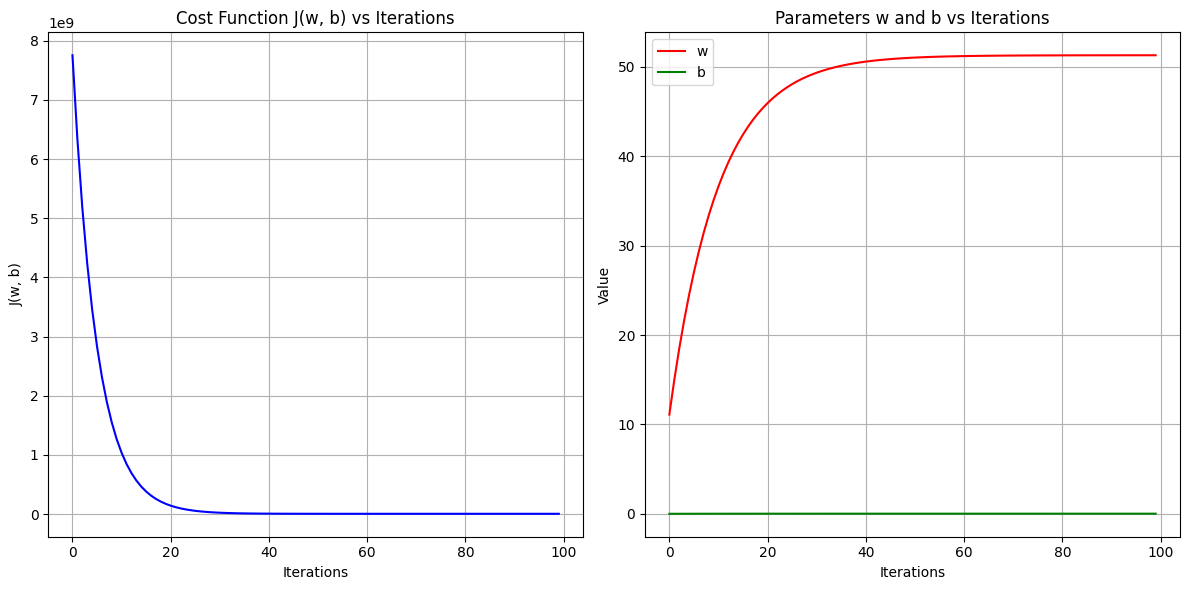

In [121]:
initial_w = 10
initial_b = 0
iteration = 100 #as our data is very small
alpha = 1.0e-8 #change this

w_final,b_final,Jwb_history,wb_history = gradient_descent(x_train,y_train,initial_w,initial_b,
                                                       alpha,iteration,compute_cost_MSE,compute_gradient)

print(f"(w,b) found by gradient descent: {w_final:8.4f},{b_final:8.4f}")

# Plot J(w, b) vs iterations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(Jwb_history)), Jwb_history, color='blue')
plt.title('Cost Function J(w, b) vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('J(w, b)')
plt.grid(True)

# Plot w and b vs iterations
plt.subplot(1, 2, 2)
plt.plot(range(len(wb_history)), [p[0] for p in wb_history], label='w', color='red')
plt.plot(range(len(wb_history)), [p[1] for p in wb_history], label='b', color='green')
plt.title('Parameters w and b vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Now that we've run gradient descent and obtained the optimal values of `w` and `b`, let's delve into some key observations:

1) The value of $ J(w,b) $ approaches zero but never reaches it (though it may appear to do so here due to the small dataset size).

2) **Experimenting with Learning Rate (alpha):**
   Try changing the value of alpha in the previous cell to observe its impact on the curve:
   - Decreasing alpha requires more iterations for J(w,b) to approach its optimal value.
   - Conversely, setting alpha too high can cause J(w,b) to diverge towards infinity, indicating instability.

3) **Effect of Intercept (`b`):**
   While we've primarily focused on a dataset where `b = 0` perfectly fits, in more complex and larger datasets, the algorithm will optimize both `w` and `b`. (Note: Even here, a non-zero value for `b` is assigned.)

4) **Convergence to Global Minimum:**
   After reaching optimal values, both graphs stabilize or plateau, showing minimal further improvement, indicating proximity to the global minimum.

Now we can use these value and predict the price of our house.

In [124]:
yhat_test = compute_model_output(x_test,w_final,b_final)
print("Prediction made by our model: ",yhat_test)
print("Target values: ",y_test)

Prediction made by our model:  [145979.74323745 137003.47737616 169061.5697379   46112.37391216
 144030.61122186]
Target values:  [148472 142544 172021  50971 144022]


#### You can see the values are pretty close, let's also test our model on the traning data so that we can then compare how our model if performing for the new w and b values

In [123]:
yhat_train = compute_model_output(x_train,w_final,b_final)
print("Prediction made by our model: ",yhat_train)
print("Target values: ",y_train)

Prediction made by our model:  [181166.7054137  174755.08694135 125821.61476039 208454.55363201
  94019.98713754 218918.31497888  77195.9002661  174344.74335912
 150544.81558976 155007.30204652 189630.04179719 128283.67625377
  68578.68503926 189424.87000608 151981.01812757]
Target values:  [177355 171147 123309 206419 100265 220856  78587 172695 151485 159836
 191537 125764  69142 192993 149357]


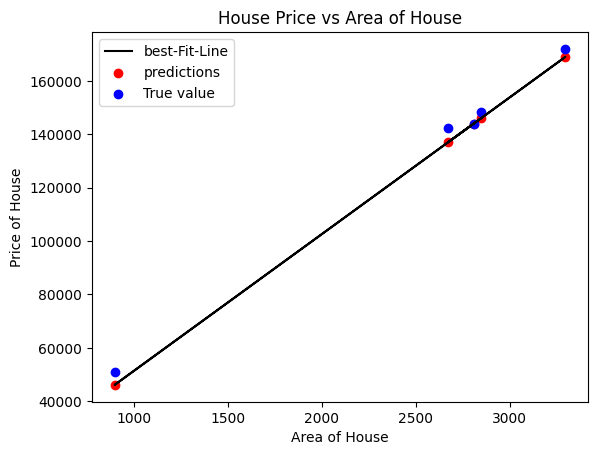

In [141]:
#let's plot the predicted data points and target value for the test data

#redefining our model function with the optimal w and b
f_wb = w_final * x_test + b_final

plt.plot(x_test,f_wb,color = 'black', linestyle = '-',label = "best-Fit-Line")
plt.scatter(x_test,yhat_test,color ="red",label = "predictions")
plt.scatter(x_test,y_test,color ="blue", label = "True value")
plt.title("House Price vs Area of House")
plt.xlabel("Area of House")
plt.ylabel("Price of House")
plt.legend()
plt.show()

In [147]:
#let's find the error percentage.
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

error_train = mean_absolute_percentage_error(y_train,yhat_train)
error_test = mean_absolute_percentage_error(y_test,yhat_test)

print("% Error in predicting the traning data:  ", error_train)
print("% Error in predicting the testing data:  ", error_test)



% Error in predicting the traning data:   1.878244762994225
% Error in predicting the testing data:   3.364799175131282


#### As shown in the graph above and the Error Percentage plot, our model is performing quite well and making predictions with high accuracy.

With this, we have successfully understood the concept of Simple Linear Regression and implemented it manually. However, this is just the beginning of our exploration into Linear Regression (and Regression in general); there are several aspects yet to cover:

1. **Different Cost Functions**: Explore various cost functions used in regression, understanding their differences, advantages, and disadvantages.
   
2. **Performance Metrics**: Introduce performance measurement metrics to compare this algorithm with others effectively.
   
3. **Multivariate Regression and Polynomial Regression**: Discuss how to extend linear regression to handle multiple input features (multivariate) and nonlinear relationships using polynomial regression (next on these).
   
4. **Regularization Techniques**: Cover regularization methods like Ridge and Lasso regression (and then these) to prevent overfitting and improve generalization.
   
5. **Advanced Topics**: Topics such as feature scaling, handling categorical variables, and dealing with missing data in regression models (EDA - Exploratory Data Analysis).

I will soon enough update on these topics.
